## import model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os

## 파일 colab에서 압축해제

쓸데없는 작업을 줄이기 위해 사용후 주석처리.

In [3]:
# # 압축파일 풀기
# path_to_zip_file = '압축파일 경로'
# directory_to_extract_to = '압축 풀고 저장할 경로'

# import zipfile
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)
# 코드 출처 https://hansonminlearning.tistory.com/42

In [4]:
# import zipfile
# #매개변수는 경로, 하위폴더에 클래스 폴더를 생성했을 경우 사용
# def unzip_hyun(data_dir):
#     for image_class in os.listdir(data_dir):
#         for image in os.listdir(os.path.join(data_dir, image_class)):        
#             path = os.path.join(data_dir, image_class,image)
#             path_sub = os.path.mk_path_test
#             #print(path)
#             with zipfile.ZipFile(path, 'r') as zip_ref:
#                 zip_ref.extractall()      

In [5]:
# data_dir = '/content/drive/MyDrive/Data/rock_scissor_paper'

In [6]:
# import zipfile

# for image_class in os.listdir(data_dir):
#     #data_dir 에서 이미지들의 클래스별 리스트를 받아옴 > rock,scissor,paper 폴더가 리스트에 저장됨, 이것을 image_class에서 받아옴(3회반복)
#     for image in os.listdir(os.path.join(data_dir, image_class)):        
#         path = os.path.join(data_dir, image_class,image)
#         path_sub = os.path.join(data_dir, image_class)
#         with zipfile.ZipFile(path, 'r') as zip_ref:
#             zip_ref.extractall(path_sub)

In [7]:
# print(path_sub)

In [8]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


##  Train set - Image 불러오기

한 번만 사용해도 되므로 사용 후 주석처리 하였음

In [9]:
# def resize_images(img_path):
# 	images=glob.glob(img_path + "/*.jpg")  
    
# 	print(len(images), " images to be resized.")

#     # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# 	target_size=(28,28)
# 	for img in images:
# 		old_img=Image.open(img)
# 		new_img=old_img.resize(target_size,Image.ANTIALIAS)
# 		new_img.save(img, "JPEG")
    
# 	print(len(images), " images resized.")

In [10]:
# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path1 =  '/content/drive/MyDrive/Data/rock_scissor_paper/scissor'
# images=glob.glob(image_dir_path1 + "/*.jpg")  
    
# print(len(images), " images to be resized.")
# # resize_images(image_dir_path1)
# print("가위 이미지 resize 완료!")

In [11]:
# # 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path2 =  '/content/drive/MyDrive/Data/rock_scissor_paper/rock'
# images=glob.glob(image_dir_path2 + "/*.jpg")  
    
# print(len(images), " images to be resized.")
# resize_images(image_dir_path2)
# print("바위 이미지 resize 완료!")

In [12]:
# # 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path3 =  '/content/drive/MyDrive/Data/rock_scissor_paper/paper'
# images=glob.glob(image_dir_path3 + "/*.jpg")  
    
# print(len(images), " images to be resized.")
# resize_images(image_dir_path3)
# print("보 이미지 resize 완료!")

In [13]:
2757 +2584+2700

8041

In [14]:
# import numpy as np

# def load_data(img_path, number_of_data=8041):  # 가위바위보 이미지 개수 총합에 주의하세요.
#     # 가위 : 0, 바위 : 1, 보 : 2
#     img_size=28
#     color=3
#     #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
#     imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
#     labels=np.zeros(number_of_data,dtype=np.int32)

#     idx=0
#     for file in glob.iglob(img_path+'/scissor/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=0   # 가위 : 0
#         idx=idx+1

#     for file in glob.iglob(img_path+'/rock/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=1   # 바위 : 1
#         idx=idx+1  
    
#     for file in glob.iglob(img_path+'/paper/*.jpg'):
#         img = np.array(Image.open(file),dtype=np.int32)
#         imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
#         labels[idx]=2   # 보 : 2
#         idx=idx+1
        
#     print("학습데이터(x)의 이미지 개수는", idx,"입니다.")
#     return imgs, labels


## 데이터 정규화

In [15]:
# image_dir_path4 = '/content/drive/MyDrive/Data/rock_scissor_paper'
# (x, y)=load_data(image_dir_path4)

In [16]:
# print('최소값:',np.min(x), ' 최대값:',np.max(x))
# x_norm = x/255.0   # 입력은 0~1 사이의 값으로 정규화
# print("x shape: {}".format(x.shape))
# print("y shape: {}".format(y.shape))

In [17]:
# plt.imshow(x[0])
# print('라벨: ', y[0])

## Tset set Image 불러오기

마찬가지로 재현을 위해 사용 할 때 쓸데없는 작업을 줄이기 위해 주석처리했음

In [18]:
data_dir2 = '/content/drive/MyDrive/Data/rsp_test/'

In [19]:
# for image_class in os.listdir(data_dir2):
#     #data_dir 에서 이미지들의 클래스별 리스트를 받아옴 > rock,scissor,paper 폴더가 리스트에 저장됨, 이것을 image_class에서 받아옴(3회반복)
#     for image in os.listdir(os.path.join(data_dir2, image_class)):        
#         path2 = os.path.join(data_dir2, image_class,image)
#         path_sub2 = os.path.join(data_dir2, image_class)
#         with zipfile.ZipFile(path2, 'r') as zip_ref:
#             zip_ref.extractall(path_sub2)

In [20]:
# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path_test1 =  '/content/drive/MyDrive/Data/rsp_test/scissor'
# resize_images(image_dir_path_test1)

# print("가위 이미지 resize 완료!")

In [21]:
# # 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path_test2 =  '/content/drive/MyDrive/Data/rsp_test/rock'
# resize_images(image_dir_path_test2)

# print("바위 이미지 resize 완료!")

In [22]:
# # 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path_test3 =  '/content/drive/MyDrive/Data/rsp_test/paper'
# resize_images(image_dir_path_test3)

# print("보 이미지 resize 완료!")

In [23]:
202+210+204

616

In [24]:
# image_dir_path5 = '/content/drive/MyDrive/Data/rsp_test'
# (x_test, y_test)=load_data(image_dir_path5,616)
# x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# print("x_test shape: {}".format(x_test.shape))
# print("y_test shape: {}".format(y_test.shape))

## 모델 정의 및 학습

## Train set validation set 분리.

In [25]:
# from sklearn.model_selection import train_test_split
# # 대문자는 데이터 셋 내에서의 test validation set
# X_train, X_test, Y_train, Y_test = train_test_split(x_norm, y,test_size=0.2,random_state=)

In [26]:
# X_train.shape

In [27]:
# Y_train.shape

## 학습과정 플로팅함수

In [28]:
# model chart
def plot_train(history1):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'validation'])

## 모델1

In [29]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=32
# n_channel_2=64
# n_dense=32
# n_train_epoch=20

# '''
# max pooling을 1회만 시행.
# max pooling을 처음에만 진행했을 경우 '''
# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2)) 
# # max pooling 대신 stride. 써보기.
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

## 모델2

In [30]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=32
# n_channel_2=64
# n_dense=64
# n_train_epoch=10

# '''
# max pooling을 1회만 시행.
# max pooling을 끝에서 진행했을 경우 '''

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)))
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2))) 
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])


# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

## 모델 3

In [31]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_dense=32
# n_train_epoch=20

# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2)) 
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2))) 
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='gelu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

In [32]:
# scale_dot_product_attention(*w_qkv,)

## 모델 4

In [33]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_channel_3=64
# n_dense=32
# n_train_epoch=10
# ''' 
# max pooling을 
# 3번 했을 경우
# '''


# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='gelu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2)) 
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

In [34]:
# n_channel_1=16
# n_channel_2=32
# n_channel_3=64
# n_train_epoch=5
# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.AveragePooling2D(2,2)) 
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.AveragePooling2D((2,2)))
# model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()

# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

뭔짓을 해도 정확도가 40% 이상을 올라가지 않습니다.

옛말에 이런말이 있습니다.

"데이터를 충분히 썼는데 성능이 올라가지 않으면 혹시 데이터가 부족한 것은 아닌지 생각해봐라."

데이터를 부풀려보려 합니다.

## 데이터 부풀리기.

In [35]:
##https://jeongmin-lee.tistory.com/5

## 바위 부풀리기

In [36]:
# import numpy as np
# import os
# from os import listdir
# from os.path import isfile, join
# from PIL import Image
 
 
 
# np.random.seed(3489)
 
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
 
 
# data_datagen = ImageDataGenerator(rescale=1./255)
 
# data_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=30, 
#                                    shear_range=5.5,  
#                                     width_shift_range=0.1,
#                                     height_shift_range=0.1,
#                                    zoom_range=0.1,
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    fill_mode='nearest') 
 
 
# filename_in_dir = [] 
 
# for root, dirs, files in os.walk('/content/drive/MyDrive/Data/rock_scissor_paper/rock'):
#     for  fname in files:
#         full_fname = os.path.join(root, fname)
#         filename_in_dir.append(full_fname)
 
# for file_image in filename_in_dir:
#     print (file_image)
#     img = load_img(file_image) 
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
 
#     i = 0
 
#     for batch in data_datagen.flow(x,save_to_dir='/content/drive/MyDrive/Data/rock_scissor_paper/rock', save_prefix='rock', save_format='jpg'):
#         i += 1
#         if i > 8:
#             break


## 가위부풀리기

In [37]:
# filename_in_dir = [] 
 
# for root, dirs, files in os.walk('/content/drive/MyDrive/Data/rock_scissor_paper/scissor'):
#     for  fname in files:
#         full_fname = os.path.join(root, fname)
#         filename_in_dir.append(full_fname)
 
# for file_image in filename_in_dir:
#     img = load_img(file_image) 
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
 
#     i = 0
 
#     for batch in data_datagen.flow(x,save_to_dir='/content/drive/MyDrive/Data/rock_scissor_paper/scissor', save_prefix='scissor', save_format='jpg'):
#         i += 1
#         if i > 8:
#             break

## 보 부풀리기

In [38]:
# filename_in_dir = [] 
 
# for root, dirs, files in os.walk('/content/drive/MyDrive/Data/rock_scissor_paper/paper'):
#     for  fname in files:
#         full_fname = os.path.join(root, fname)
#         filename_in_dir.append(full_fname)
 
# for file_image in filename_in_dir:
#     img = load_img(file_image) 
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
 
#     i = 0
 
#     for batch in data_datagen.flow(x,save_to_dir='/content/drive/MyDrive/Data/rock_scissor_paper/paper', save_prefix='paper', save_format='jpg'):
#         i += 1
#         if i > 8:
#             break

In [39]:
# image_dir_path1 =  '/content/drive/MyDrive/Data/rock_scissor_paper/scissor'
# images=glob.glob(image_dir_path1 + "/*.jpg")  
    
# print(len(images), " images to be resized.")
# image_dir_path2 =  '/content/drive/MyDrive/Data/rock_scissor_paper/rock'
# images=glob.glob(image_dir_path2 + "/*.jpg")  
    
# print(len(images), " images to be resized.")
# image_dir_path3 =  '/content/drive/MyDrive/Data/rock_scissor_paper/paper'
# images=glob.glob(image_dir_path3 + "/*.jpg")  
    
# print(len(images), " images to be resized.")

In [40]:
12757+12584+12700

38041

약 3만 8천개의 이미지를 data set으로 만들었습니다.

In [41]:
import numpy as np

def load_data(img_path, number_of_data=38041):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [42]:
image_dir_path4 = '/content/drive/MyDrive/Data/rock_scissor_paper'
(x, y)=load_data(image_dir_path4)

학습데이터(x)의 이미지 개수는 38041 입니다.


In [43]:
print('최소값:',np.min(x), ' 최대값:',np.max(x))
x_norm = x/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x shape: {}".format(x.shape))
print("y shape: {}".format(y.shape))

최소값: 0  최대값: 255
x shape: (38041, 28, 28, 3)
y shape: (38041,)


In [44]:
from sklearn.model_selection import train_test_split
# 대문자는 데이터 셋 내에서의 test validation set
X_train, X_test, Y_train, Y_test = train_test_split(x_norm, y,test_size=0.2,random_state=3489)

## 테스트 2차 시도.

가장 성능이 좋았던 모델을 학습및 테스트에 사용해보겠습니다

In [45]:
# image_dir_path5 = '/content/drive/MyDrive/Data/rsp_test'
# (x_test, y_test)=load_data(image_dir_path5,616)
# x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

# print("x_test shape: {}".format(x_test.shape))
# print("y_test shape: {}".format(y_test.shape))

In [46]:
# model chart
def plot_train(history1):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'])

    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'validation'])

In [47]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np

# n_channel_1=16
# n_channel_2=32
# n_dense=3
# n_train_epoch=50


# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(16, (3,3), activation='gelu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(12, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# print('Model에 추가된 Layer 개수: ', len(model.layers))

# model.summary()

# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=100,callbacks=[es],epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

In [48]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_channel_3=64
# n_dense=64
# n_train_epoch=50


# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2)) 
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=100,callbacks=[es],epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

In [49]:
# # 바꿔 볼 수 있는 하이퍼파라미터들
# n_channel_1=16
# n_channel_2=32
# n_dense=100
# n_train_epoch=50

# '''
# max pooling을 1회만 시행.
# max pooling을 처음에만 진행했을 경우 '''
# model=keras.models.Sequential()
# model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
# model.add(keras.layers.MaxPool2D(2,2)) 
# # max pooling 대신 stride. 써보기.
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(keras.layers.Dense(3, activation='softmax'))

# model.summary()
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
# es = EarlyStopping(monitor='val_loss', patience=1, verbose=1)
# # 모델 훈련 기록 저장.
# history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=100,callbacks=[es],epochs=n_train_epoch)
# # 플로팅
# plot_train(history)
# # 모델 시험
# test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

## 중간 점검 :: 정확도가 나오지 않는 이유에 대해..

이렇게까지 했는데도 안 됐다는건 세 가지 경우이다.

1. Train dataset이 잘못되었다.
2. Model에 문제가 있다.
3. Test set에도 문제가 있다.

**1 과 3 가설** 중 **3이 유력해 보인다.** 왜냐하면 모델을 아무리 바꿔도 정확도는 약 41~45% 를 넘지 못했으며,유의미하게 정확도가 높아지는 퍼포먼스를 보여준 적이 없기 때문에 모델의 문제가 아니라는 추론이다.

따라서 의심해 볼것은 Train set과 Test set인데. Train set과 Validation set을8:2로 나눠서 검증을 했을 때 Validation set에 대한 정확도는 약 91% 였다.

따라서 Test set에 무언가 문제가 있다는 합리적인 의심에 이르렀다.

따라서 새로운 Test set을 찾아 시험해보려 한다.

## 새 데이터 준비

Test set은 Notion에 올라온 가위 바위 보 사진 중 기존 학습 데이터 셋에 포함 시키지 않은 사진을 가져와 사용하였음을 분명히 밝힌다.

In [50]:
# def resize_images(img_path):
# 	images=glob.glob(img_path + "/*.jpg")  
    
# 	print(len(images), " images to be resized.")

#     # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# 	target_size=(28,28)
# 	for img in images:
# 		old_img=Image.open(img)
# 		new_img=old_img.resize(target_size,Image.ANTIALIAS)
# 		new_img.save(img, "JPEG")
    
# 	print(len(images), " images resized.")

In [53]:
# resize_images('/content/drive/MyDrive/Data/rsp_new_test/scissor')
# print("가위 이미지 resize 완료!")

# resize_images('/content/drive/MyDrive/Data/rsp_new_test/rock')
# print("바위 이미지 resize 완료!")

# resize_images('/content/drive/MyDrive/Data/rsp_new_test/paper')
# print("보 이미지 resize 완료!")

image_dir_path6 = '/content/drive/MyDrive/Data/rsp_new_test'

In [54]:
(x_test, y_test)=load_data(image_dir_path6,306)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x)의 이미지 개수는 306 입니다.
x_test shape: (306, 28, 28, 3)
y_test shape: (306,)


## 테스트 3차시도

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 5184)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                165920    
                                                      

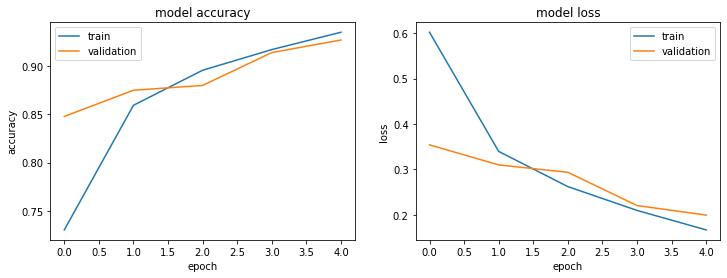

In [58]:
# 가장 결과가 좋은 모델 - Test 시 사용.
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=5

'''
max pooling을 1회만 시행.
max pooling을 처음에만 진행했을 경우 '''
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2)) 
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# 모델 훈련 기록 저장.
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=10,epochs=n_train_epoch)
# 플로팅
plot_train(history)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

## 결과 ::  batch_size=default 일때

### Epoch = 5 일 때

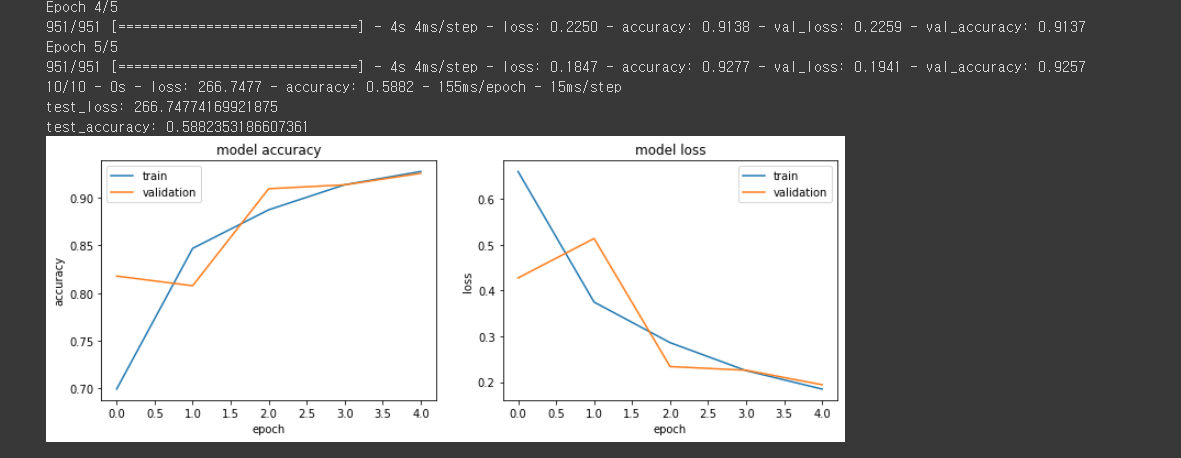

### Epoch = 10 일때.

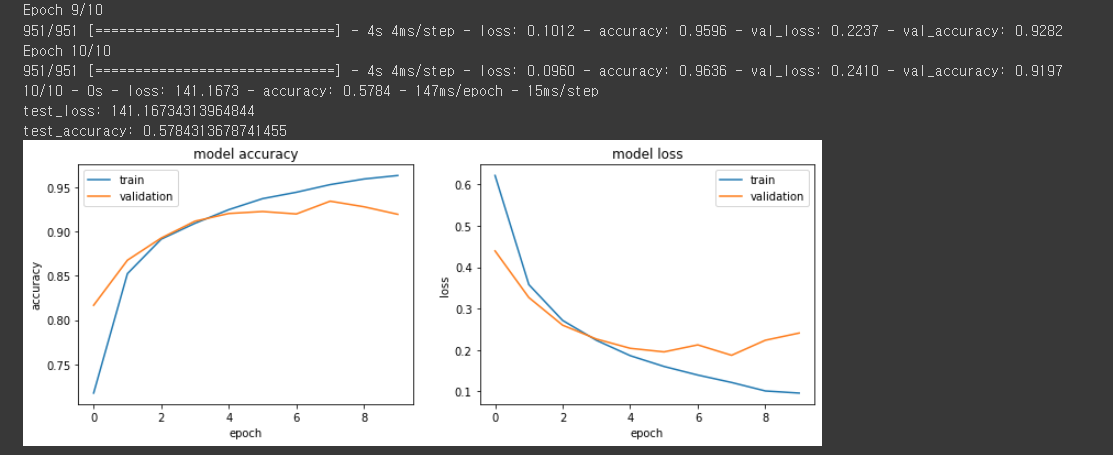

### Epoch = 15 일 때

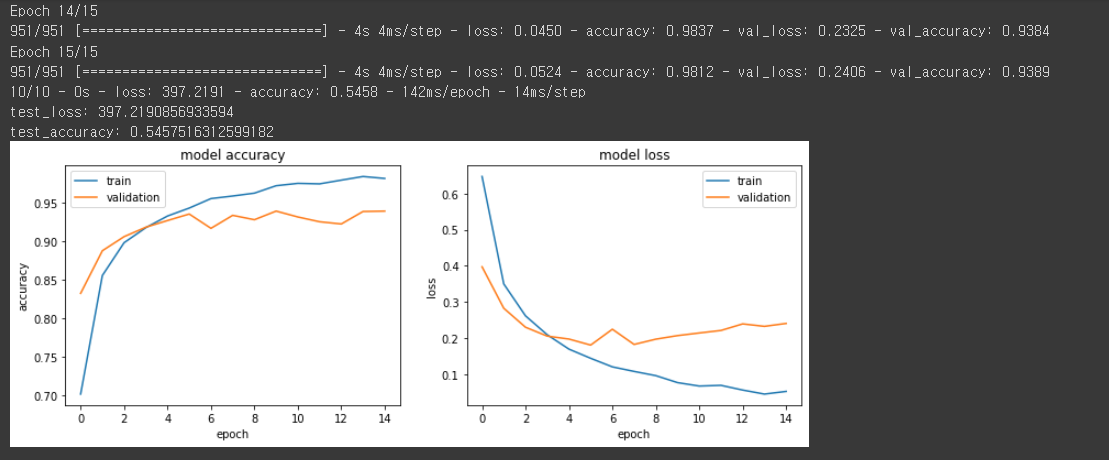

### Epoch = 20 일 때

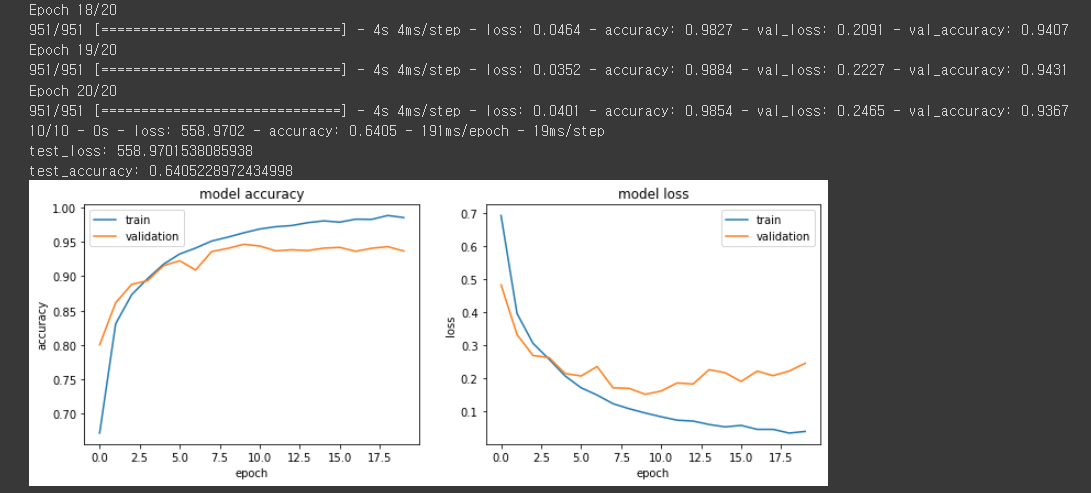

## 결과  ::  batch_size = 10 일때

### Epoch = 3

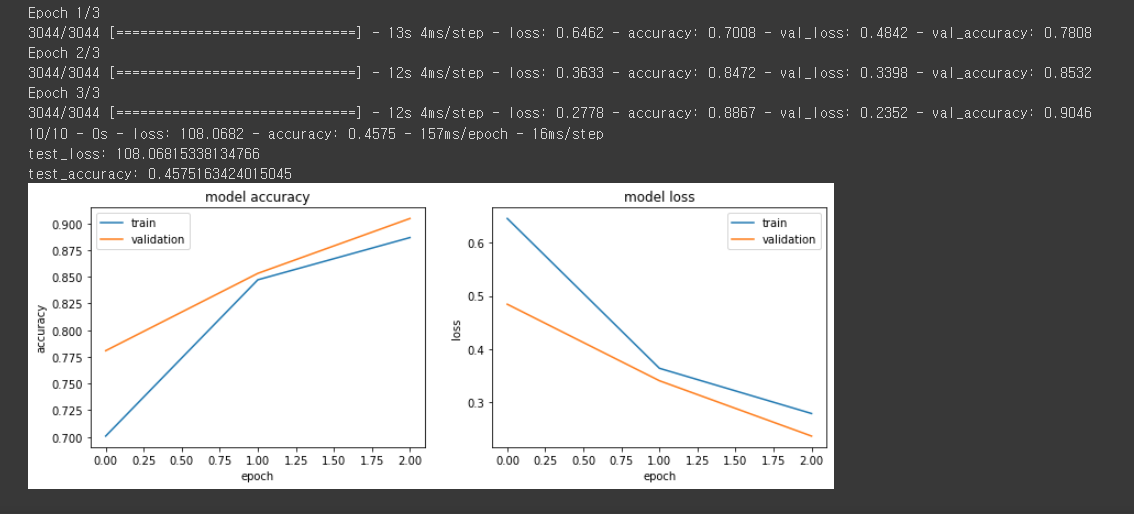

### Epoch = 5

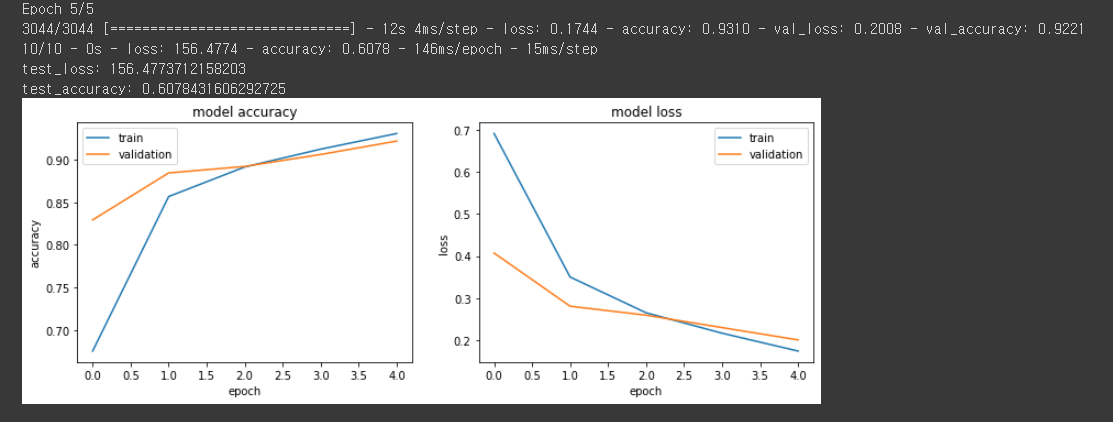

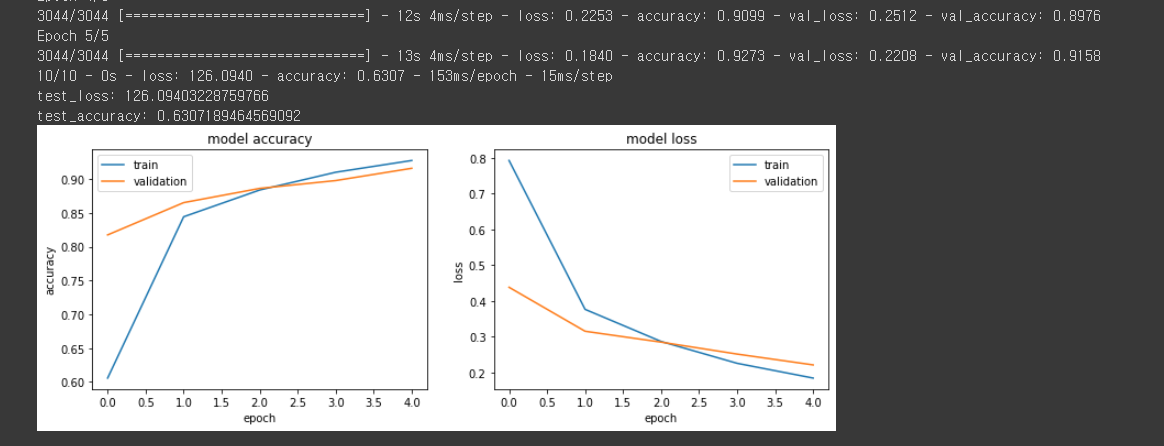

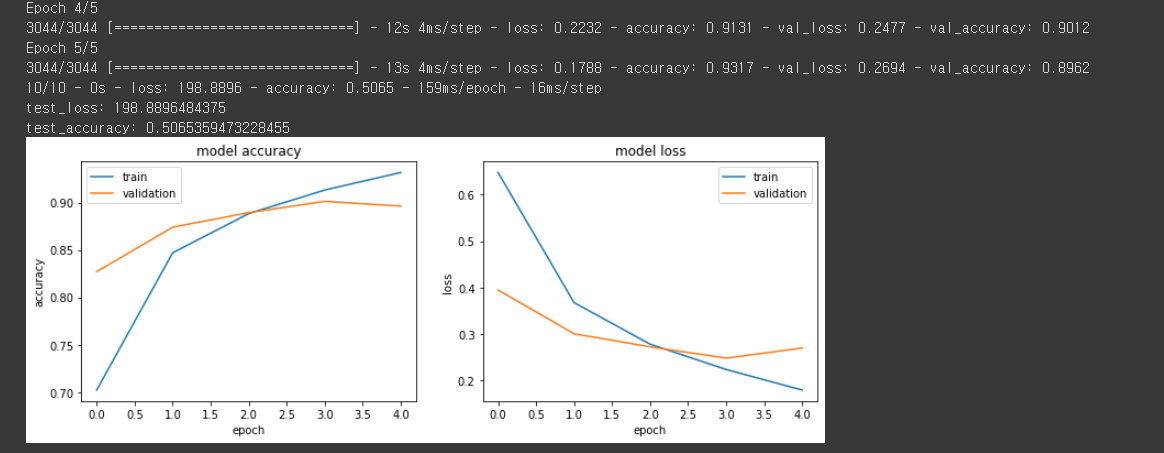

모델을 반복해서 피팅 할수록 정확도가 떨어져 중단하였다.

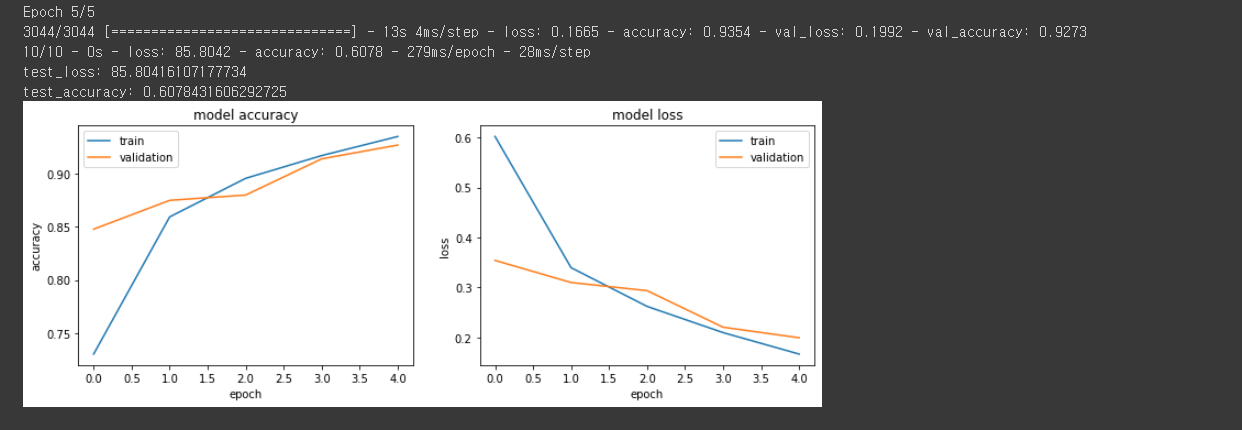

런타임 초기화 후 피팅했을 때 결과로 캡처는 못했지만 정확도가 58%~63% 사이를 넘나드는 것으로 보인다. 

이유는 가중치를 처음에 랜덤으로 정할 때의 시드값을 고정하지 않아서 생기는 결과인것 같다.

### Epoch = 10

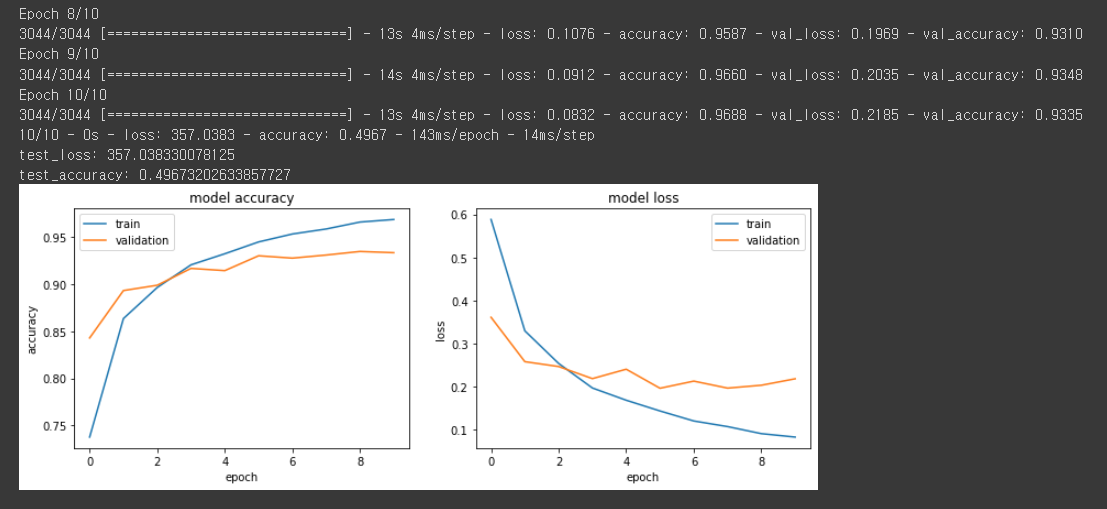

정확도가 너무 떨어져 재현에 의미가 없으므로 중단.

# 결론 및 고찰

이번에 실습을 진행하며 느낀 것은 학습시킬 모델의 Layer를 어떻게 쌓는지도 중요하지만 

더 중요한 것은 바로 데이터의 양이란 신념으로 데이터를 모델에 학습시키기 위한 사이즈 조절을 제외하고

데이터의 양을 늘리기 위한 작업만 진행했으며 배경을 깔끔하게 만든다던가, 배경을 바꿔 보던가 하는 등의 작업은 일절 진행 하지 않은 상태에서 실습을 해보았다.

다만 이상했던 점은 테스트 데이터를 분명 잘 골랐다고 생각했는데 막상 예측을 시키니 제대로 분류하지 못했다는 점이다.

혹시나 싶어 테스트 데이터를 바꾸자마자 정확도가 상승하는 것을 보고 배신감과 더불어 의문이 생겼다.

**그럼 내 모델은 안정성과 신뢰성을 담보할 수 있는가?**

다른 특정 데이터에서만 높은 정확성을 가진 모델은 안정성을 담보할 수 없다고 생각하기 때문에

지금의 모델은 반쪽도 아닌 1/4 짜리 모델이라고 생각한다. 

왜냐하면 딥 러닝을 통해 모델을 학습시키는 이유는 

많은 데이터를 학습시켜 편향적인 데이터를 가지고 모델로 예측하려는 것이 아닌

어떤 데이터를 내밀던 잘 예측하는 모델을 만들기 위해서인데 그것이 불가능 하다면 의미가 없다고 생각한다.

그렇다면 어떻게 이를 해결할 수 있는지를 생각해 보았을 때

1. 더 나은 모델을 찾는것

2. 더 많은 데이터를 학습시킬 것

그나마 여기서 내가 할 수 있을만한 것은 2번 정도인데 알 수는 없지만 google Drive의 폴더 내 파일 수 제한이 있는 것 같아

더 많은 데이터를 학습 시킬 수 없어서 조금 아쉬웠다.

(원래 계획은 3만 8천개가 아닌 24만개 정도의 데이터를 3.8만개의 데이터에서  generation하여 학습시키려고 했었다.)







